# Assignmnet 2 (100 points)

**Name:** Alexnader Vaptsarov<br>
**Email:** alv3651@thi.de<br>
**Group:** A <br>
**Hours spend *(optional)* :** More than 6h<br>

### SMS Spam Detection *(100 points)*

<p>You are hired as an AI expert in the development department of a telecommunications company. The first thing on your orientation plan is a small project that your boss has assigned you for the following given situation. Your supervisor has given away his private cell phone number on too many websites and is now complaining about daily spam SMS. Therefore, it is your job to write a spam detector in Python. </p>

<p>In doing so, you need to use a Naive Bayes classifier that can handle both bag-of-words (BoW) and tf-idf features as input. For the evaluation of your spam detector, an SMS collection is available as a dataset - this has yet to be suitably split into train and test data. To keep the costs as low as possible and to avoid problems with copyrights, your boss insists on a new development with Python.</p>

<p>Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements.</p>

<p>Note: You need to implement the bag-of-words (BoW) and tf-idf feature extractor from scratch. You can use existing python libraries for other tasks.</p>

**Dataset and Resources**

* SMS Spam Collection Dataset: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [1]:
import pandas as pd
import math 
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict

In [19]:
class customData():
    def __init__(self):
        self.documents = None
        self.vocabulary = None
        
    def __str__(self):
        plt.figure(figsize=(17, 7))
        plt.subplot(1,2,2)
        self.df.label.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True, colors = ['green','red'],
                                  textprops={'fontsize':15, 'color':'white'})
        plt.ylabel('Message Type', fontsize=16)
        plt.title('Proportional Distribution of Message Type', fontsize=18)
        plt.legend()
        
        ham, spam = df.label.value_counts()
        return f'The number of ham: {ham}, The number of spam: {spam}'

    def loading_data(self, filepath):        
        df = pd.read_csv('sms+spam+collection/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
        self.df = df
        return df

    def pre_processing(self, documents):
        # data['message'] = data['message'].astype("string")
        tokens = word_tokenize(documents.lower())
    
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
   
        lemmatizer = WordNetLemmatizer()
        documents = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        # documents = re.sub(r'\W', ' ', documents)
        # documents = documents.lower()
        # words = documents.split()
        
        # return words
        
        self.documents = documents 
        return self.documents


    def create_vocabulary(self, messages):
        vocabulary = defaultdict(int)
        for message in messages:
            for word in message:
                vocabulary[word] += 1
        return vocabulary

class customVectorizer():
    def __init__(self):
        pass
        
    def BoW(self, messages, vocabulary):
        vectors = []
        for message in messages:
            vector = np.zeros(len(vocabulary))
            for word in message:
                if word in vocabulary:
                    vector[list(vocabulary.keys()).index(word)] += 1
            vectors.append(vector)
        return np.array(vectors)

    def tf_idf(self, messages, vocabulary):
        N = len(messages)
        df = defaultdict(int)
        tf_idf = []
    
        for message in messages:
            word_count = defaultdict(int)
            for word in message:
                word_count[word] += 1
            tf_idf_vector = []
            for word in vocabulary:
                tf = math.log(1 + word_count[word])
                if word_count[word] > 0:
                    df[word] += 1
                idf = math.log(N / (df[word] + 1)) + 1
                tf_idf_vector.append(tf * idf)
            tf_idf.append(tf_idf_vector)
        return np.array(tf_idf)

    Load dataset

The number of ham: 4825, The number of spam: 747


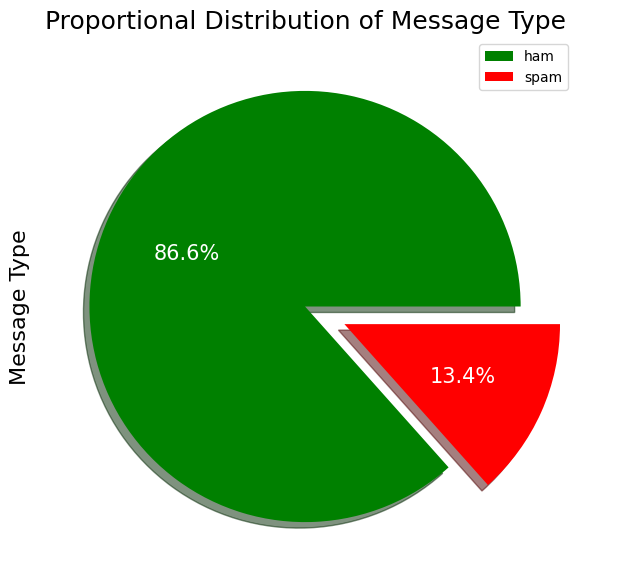

In [20]:
data = customData()
df = data.loading_data('sms+spam+collection/SMSSpamCollection')
print(data)

    Preprocess and split the dataset

In [21]:
df['message'] = df['message'].apply(data.pre_processing)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

vocabulary = data.create_vocabulary(X_train)

In [22]:
vocabulary

defaultdict(int,
            {'reply': 124,
             'win': 62,
             '£100': 20,
             'weekly': 22,
             '!': 1094,
             '2006': 1,
             'fifa': 1,
             'world': 34,
             'cup': 6,
             'held': 2,
             '?': 1275,
             'send': 156,
             'stop': 131,
             '87239': 4,
             'end': 43,
             'service': 60,
             'hello': 42,
             '.': 3805,
             'sort': 11,
             'town': 21,
             'already': 69,
             'dont': 111,
             'rush': 4,
             'home': 136,
             ',': 1582,
             'eating': 7,
             'nacho': 1,
             'let': 78,
             'know': 214,
             'eta': 2,
             'come': 202,
             'guoyang': 1,
             'go': 247,
             'n': 124,
             'tell': 118,
             'u': 963,
             'told': 45,
             'hey': 90,
             'sathya': 2,
      

    Vectorize the training and test data

In [23]:
vectorizer = customVectorizer()

X_train_bow = vectorizer.BoW(X_train, vocabulary)
X_test_bow = vectorizer.BoW(X_test, vocabulary)

X_train_tfidf = vectorizer.tf_idf(X_train, vocabulary)
X_test_tfidf = vectorizer.tf_idf(X_test, vocabulary)

    Train the Naive Bayes classifier

In [24]:
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

    Predictions and Evaluation

In [25]:
y_pred_bow = nb_bow.predict(X_test_bow)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

In [26]:
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='spam')
    recall = recall_score(y_true, y_pred, pos_label='spam')
    f1 = f1_score(y_true, y_pred, pos_label='spam')
    return accuracy, precision, recall, f1

    Evaluate BoW model

In [27]:
accuracy_bow, precision_bow, recall_bow, f1_bow = evaluate(y_test, y_pred_bow)
print(f'BoW - Accuracy: {accuracy_bow}, Precision: {precision_bow}, Recall: {recall_bow}, F1 Score: {f1_bow}')


BoW - Accuracy: 0.9883408071748879, Precision: 0.9857142857142858, Recall: 0.9261744966442953, F1 Score: 0.9550173010380623


    Evaluate TF-IDF model

In [28]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = evaluate(y_test, y_pred_tfidf)
print(f'TF-IDF - Accuracy: {accuracy_tfidf}, Precision: {precision_tfidf}, Recall: {recall_tfidf}, F1 Score: {f1_tfidf}')


TF-IDF - Accuracy: 0.9811659192825112, Precision: 0.9102564102564102, Recall: 0.9530201342281879, F1 Score: 0.9311475409836065


#### Findings:

    It is immportant to mention that the BoW model doeas not consider the importance of word across all documents, but TF-IDF still might fail when the words have the same score in both the spam and ham datasets, so it is importat to consider more advanced models or statistical methods like feature selection.
    
    Now here in my pre-procces function I have only used lemmatization, in the future I will try also steming which should have better effects. Also I will try to use LSTM which should have a better perforance and generally there are a lot of other impovement I can play around with!

    I also want to implemet my custom bayes classifier, but I will do this in the furture!
    
    In conclusion I will keep momdifying my model and try to learn more while making in more accurate.

p.s (I deleted a lot of thing and tryed to make it look clean)

    practice 

    vocabulary and token sequence

In [29]:
# # count the word (token) in the corpus and the terms (types)
# outer_list = []
# def get_vocab(data):
#     for sentence in data:
#         if type(sentence) == list: 
#             get_vocab(sentence)
#         else: 
#             outer_list.append(sentence)
#     return outer_list
    
# token_sequence = get_vocab(documents['message'])
# vocabulary = sorted(set(token_sequence))
# vocabulary

    term count (frequency of occurance)

In [30]:
# # word count
# term_count = dict.fromkeys(vocabulary, 0)
# for word in token_sequence:
#     term_count[word] += 1
# # sorted(term_count.items(), key=lambda x: x[1], reverse=True)

    term frequency

In [31]:
# #computing the term frequency of each word
# term_freq = {}
# document_length = len(token_sequence)
# for word, count in term_count.items():
#     term_freq[word] = math.log10(1 + count)
    
# sorted(term_freq.items(), key=lambda x: x[1], reverse=True)

    document frequency 

In [30]:
# #computing the document frequency of each term
# corpus = data['message']
# document_frequency = dict.fromkeys(vocabulary, 0)
# for term in vocabulary:
#     for index in range(len(corpus)):
#         for word in corpus[index]:
#             if word == term:
#                 document_frequency[term] += 1
#                 break

In [31]:
# sorted(document_frequency.items(), key=lambda x: x[1], reverse=True)

[('u', 868),
 ('call', 552),
 ('im', 434),
 ('get', 378),
 ('ur', 309),
 ('go', 290),
 ('ok', 271),
 ('dont', 265),
 ('know', 249),
 ('got', 240),
 ('day', 238),
 ('ill', 237),
 ('come', 234),
 ('like', 230),
 ('free', 227),
 ('good', 223),
 ('time', 220),
 ('ltgt', 214),
 ('want', 206),
 ('text', 195),
 ('send', 187),
 ('love', 177),
 ('need', 172),
 ('today', 168),
 ('one', 167),
 ('going', 165),
 ('home', 160),
 ('see', 157),
 ('txt', 154),
 ('still', 152),
 ('r', 147),
 ('sorry', 147),
 ('back', 146),
 ('lor', 143),
 ('think', 143),
 ('take', 139),
 ('tell', 138),
 ('phone', 135),
 ('stop', 135),
 ('ü', 134),
 ('mobile', 133),
 ('new', 133),
 ('reply', 133),
 ('well', 133),
 ('later', 131),
 ('please', 128),
 ('n', 122),
 ('week', 121),
 ('cant', 120),
 ('da', 118),
 ('make', 118),
 ('hi', 115),
 ('say', 113),
 ('hey', 110),
 ('night', 110),
 ('claim', 109),
 ('oh', 108),
 ('much', 107),
 ('give', 104),
 ('great', 104),
 ('hope', 104),
 ('thing', 103),
 ('dear', 102),
 ('na', 102),

    inverse document frequency (IDF)

In [32]:
# #computing IDF
# N = len(data['message'])
# idf = dict.fromkeys(vocabulary,0)
# for word, count in document_frequency.items():
#     idf[word] = math.log10(N / (1 + count)) + 1

In [33]:
# sorted(idf.items(), key=lambda x: x[1], reverse=True)

[('aa', 4.445136968713304),
 ('aaniye', 4.445136968713304),
 ('aaooooright', 4.445136968713304),
 ('ab', 4.445136968713304),
 ('abbey', 4.445136968713304),
 ('abdomen', 4.445136968713304),
 ('abeg', 4.445136968713304),
 ('abelu', 4.445136968713304),
 ('aberdeen', 4.445136968713304),
 ('abnormally', 4.445136968713304),
 ('aboutas', 4.445136968713304),
 ('abroad', 4.445136968713304),
 ('absence', 4.445136968713304),
 ('absolutely', 4.445136968713304),
 ('abstract', 4.445136968713304),
 ('abuse', 4.445136968713304),
 ('abuser', 4.445136968713304),
 ('academic', 4.445136968713304),
 ('accent', 4.445136968713304),
 ('accenture', 4.445136968713304),
 ('accessible', 4.445136968713304),
 ('accidant', 4.445136968713304),
 ('accommodation', 4.445136968713304),
 ('accommodationvouchers', 4.445136968713304),
 ('accomodate', 4.445136968713304),
 ('accomodations', 4.445136968713304),
 ('accordin', 4.445136968713304),
 ('accordinglyor', 4.445136968713304),
 ('accounting', 4.445136968713304),
 ('accum

    TF-IDF

In [34]:
# #compute TF-IDF
# tf_idf = dict.fromkeys(vocabulary,0)
# for word, count in idf.items():
#     tf_idf[word] = count * term_freq[word]

In [35]:
# sorted(tf_idf.items(), key=lambda x: x[1], reverse=True)

[('ltgt', 5.895483040161842),
 ('ur', 5.844853814755297),
 ('free', 5.840670504649782),
 ('ü', 5.834482330261114),
 ('love', 5.790498045115925),
 ('n', 5.764783405495168),
 ('stop', 5.75143188941289),
 ('dont', 5.746739205781543),
 ('text', 5.728541489202558),
 ('hi', 5.721530439408928),
 ('r', 5.7187880772904975),
 ('happy', 5.717313547160773),
 ('mobile', 5.7143839933430725),
 ('lor', 5.710833871542942),
 ('day', 5.70616509435702),
 ('like', 5.704912787261327),
 ('know', 5.701811575424212),
 ('come', 5.699462901235895),
 ('one', 5.6973183217428405),
 ('good', 5.6940857581412105),
 ('go', 5.692344120531141),
 ('time', 5.690322683114242),
 ('got', 5.681337192219593),
 ('da', 5.680688622957908),
 ('need', 5.6804368288176095),
 ('reply', 5.676338833181949),
 ('week', 5.674802008515028),
 ('want', 5.6682840591267345),
 ('txt', 5.660776015981911),
 ('ill', 5.657135076071529),
 ('sorry', 5.656429440879414),
 ('ok', 5.653253932654147),
 ('going', 5.647076476615196),
 ('im', 5.645453476424695

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*